___
# Ciência dos Dados - PROJETO 1

## Lucca Delchiaro Costabile
___

## Como a posse de celulares e a presença de maiores de 10 anos vem interferindo no uso de internet em microcomputadores em familia com diferentes rendas? E quais são os grupos com melhor potencial para investimento de obtenção de novos clientes de redes móvies?

___
## Introdução

O trabalho consiste em comparações que mostram primeiro como o número de pessoas com mais de 10 anos dentro de residencias se relaciona com a renda media dessas faílias.

E então faz uma analise das faixas de renda e quais tem maior preferencia para microcomputadores ao invés de telefones celulares procurando identificar grupos relevantes que se encaixem nessa descrissão.

___
## Análise e Resultados

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

In [4]:
                                                      #PREPARAÇÃO#

#DEFINiÇÃO DO DATABASE

Dados1=pd.read_csv('DFInicial.csv',sep=',')

Dados1.dropna
#DECLARAÇÃO DAS VARIAVEIS QUALITATIVAS

Dados1['Para acessar a Internet utiliza-se telefone celular'] = Dados1['Para acessar a Internet utiliza-se telefone celular'].astype('category')
Dados1['Para acessar a Internet utiliza-se microcomputador']=Dados1['Para acessar a Internet utiliza-se microcomputador'].astype('category')
Dados1['Faixa do rendimento mensal domiciliar per capita ']=Dados1['Faixa do rendimento mensal domiciliar per capita '].astype('category')
Dados1['Tem telefone movel celular']=Dados1['Tem telefone movel celular'].astype('category')
#Jovens=Jovens.astype('category')


#NOME DAS QUALITATIVAS

Dados1['Para acessar a Internet utiliza-se telefone celular'].cat.categories = ('Sim','Não' )
Dados1['Para acessar a Internet utiliza-se microcomputador'].cat.categories = ('Sim','Não')
Dados1['Faixa do rendimento mensal domiciliar per capita '].cat.categories = ('Sem rendimento',
'Até ¼ salário mínimo',
'Mais de ¼ até ½ salário mínimo',
'Mais de ½ até 1 salário mínimo',
'Mais de 1 até  2 salários mínimos',
'Mais de  2 até  3 salários mínimos',
'Mais de 3 até 5 salários mínimos',
'Mais de 5 salários mínimos',
'Sem declaração'
)
Dados1['Tem telefone movel celular'].cat.categories = ('Sim','Não')
 

#Definição de variaveis para facilitar e retiragem dos "NaNs"

Jovens=Dados1['Total de moradores de 10 anos ou mais'] .dropna()
UsaCel=Dados1['Para acessar a Internet utiliza-se telefone celular'].dropna()
UsaPC=Dados1['Para acessar a Internet utiliza-se microcomputador'].dropna()
TemCel=Dados1['Tem telefone movel celular'].dropna()
FaixaRend=Dados1['Faixa do rendimento mensal domiciliar per capita '].dropna()
Rend=Dados1['Rendimento mensal domiciliar per capita '].dropna()
Jovens=Jovens.dropna()





Fiz análises brutas para testar os primeiros filtros


In [5]:
UsaCel1=UsaCel.value_counts(True)
UsaCel1
#dados.EDUCACAO.value_counts(True)
#dados.EDUCACAO.value_counts(True)

Sim    0.928679
Não    0.071321
Name: Para acessar a Internet utiliza-se telefone celular, dtype: float64

In [6]:
UsaPC1=UsaPC.value_counts(True)
UsaPC1

Sim    0.677315
Não    0.322685
Name: Para acessar a Internet utiliza-se microcomputador, dtype: float64

In [7]:
TemCel1=TemCel.value_counts(True)
TemCel1

Sim    0.917076
Não    0.082924
Name: Tem telefone movel celular, dtype: float64

In [8]:
FaixaRend1=FaixaRend.value_counts(True)
FaixaRend1

Mais de ½ até 1 salário mínimo        0.303089
Mais de 1 até  2 salários mínimos     0.266367
Mais de ¼ até ½ salário mínimo        0.151706
Mais de  2 até  3 salários mínimos    0.080643
Até ¼ salário mínimo                  0.067459
Mais de 3 até 5 salários mínimos      0.056080
Mais de 5 salários mínimos            0.049237
Sem declaração                        0.019612
Sem rendimento                        0.005808
Name: Faixa do rendimento mensal domiciliar per capita , dtype: float64

In [9]:
CelEPc=pd.crosstab(UsaCel,UsaPC)
SoCel=Dados1[(Dados1['Para acessar a Internet utiliza-se telefone celular']=='Sim') &
             (Dados1['Para acessar a Internet utiliza-se microcomputador']=='Não') &
             (Dados1['Rendimento mensal domiciliar per capita ']!=999999999999)] 

SoPc=Dados1[(Dados1['Para acessar a Internet utiliza-se telefone celular']=='Não') &
            (Dados1['Para acessar a Internet utiliza-se microcomputador']=='Sim')&
            (Dados1['Rendimento mensal domiciliar per capita ']!=999999999999)]

In [10]:
SoPc

,Unnamed: 0,Faixa do rendimento mensal domiciliar per capita,Para acessar a Internet utiliza-se microcomputador,Para acessar a Internet utiliza-se telefone celular,Rendimento mensal domiciliar per capita,Tem telefone movel celular,Total de moradores de 10 anos ou mais
2,2,Mais de 1 até 2 salários mínimos,Sim,Não,1150.0,Sim,1.0
5,5,Mais de 2 até 3 salários mínimos,Sim,Não,1990.0,Não,1.0
19,19,Mais de ½ até 1 salário mínimo,Sim,Não,600.0,Sim,2.0
32,32,Mais de ¼ até ½ salário mínimo,Sim,Não,366.0,Sim,5.0
33,33,Até ¼ salário mínimo,Sim,Não,175.0,Sim,4.0
42,42,Mais de 1 até 2 salários mínimos,Sim,Não,975.0,Sim,4.0
43,43,Mais de 1 até 2 salários mínimos,Sim,Não,850.0,Sim,2.0
45,45,Mais de ½ até 1 salário mínimo,Sim,Não,480.0,Sim,4.0
197,197,Mais de ¼ até ½ salário mínimo,Sim,Não,297.0,Sim,2.0
272,272,Mais de 1 até 2 salários mínimos,Sim,Não,808.0,Sim,3.0


In [11]:
SoCel

,Unnamed: 0,Faixa do rendimento mensal domiciliar per capita,Para acessar a Internet utiliza-se microcomputador,Para acessar a Internet utiliza-se telefone celular,Rendimento mensal domiciliar per capita,Tem telefone movel celular,Total de moradores de 10 anos ou mais
17,17,Mais de ½ até 1 salário mínimo,Não,Sim,750.0,Sim,3.0
23,23,Mais de 3 até 5 salários mínimos,Não,Sim,2666.0,Sim,2.0
54,54,Mais de 2 até 3 salários mínimos,Não,Sim,2100.0,Sim,2.0
66,66,Mais de ½ até 1 salário mínimo,Não,Sim,635.0,Sim,4.0
71,71,Mais de ½ até 1 salário mínimo,Não,Sim,550.0,Sim,3.0
72,72,Mais de ½ até 1 salário mínimo,Não,Sim,590.0,Sim,5.0
73,73,Mais de 3 até 5 salários mínimos,Não,Sim,2800.0,Sim,2.0
76,76,Mais de 1 até 2 salários mínimos,Não,Sim,1500.0,Sim,2.0
77,77,Mais de 1 até 2 salários mínimos,Não,Sim,837.0,Sim,3.0
78,78,Mais de ½ até 1 salário mínimo,Não,Sim,675.0,Sim,4.0


Decidi dividir o dataframe filtrado em faixas a partir do numero de moradores com mais de 10 anos nas casas

In [12]:
SoPc3=SoPc[SoPc["Total de moradores de 10 anos ou mais"]<=3]
SoPc5=SoPc[(SoPc["Total de moradores de 10 anos ou mais"]>3) & (SoPc["Total de moradores de 10 anos ou mais"]<=5)]
SoPc6=SoPc[SoPc["Total de moradores de 10 anos ou mais"]>5]

In [13]:
SoCel3=SoCel[SoCel["Total de moradores de 10 anos ou mais"]<=3]
SoCel5=SoCel[(SoCel["Total de moradores de 10 anos ou mais"]>3) & (SoCel["Total de moradores de 10 anos ou mais"]<=5)]
SoCel6=SoCel[SoCel["Total de moradores de 10 anos ou mais"]>5]

Plotei estogramas de renda das 3 divisões para pessoas que só usam internet no celular e pessoas que só usam internet nos pc


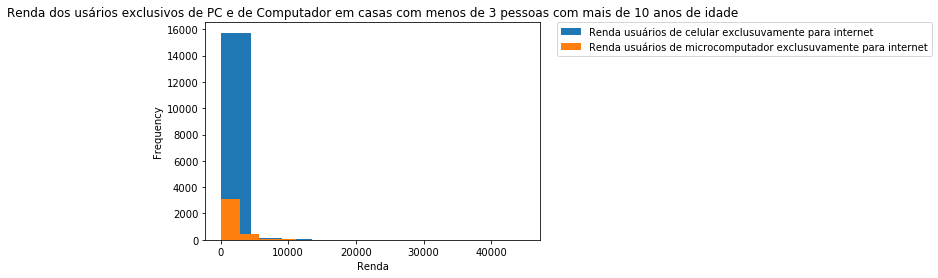

In [43]:
RendSoCel3=SoCel3['Rendimento mensal domiciliar per capita ']
RendSoCel3.plot.hist(label='Renda usuários de celular exclusuvamente para internet')

RendSoPc3=SoPc3['Rendimento mensal domiciliar per capita ']
RendSoPc3.plot.hist(label='Renda usuários de microcomputador exclusuvamente para internet')

plt.xlabel('Renda')
plt.title('Renda dos usários exclusivos de PC e de Computador em casas com menos de 3 pessoas com mais de 10 anos de idade')

Azul=mpatches.Patch(color='blue', label='Usuários de celular exclusuvamente para internet')
Laranja=mpatches.Patch(color='orange', label='Usuários de computador exclusuvamente para internet')

plt.legend(handles=[Azul,Laranja])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


Aqui, pode-se notar que aqueles com preferencia para celular e com uma baixa população ativa em casa possuem uma renda numericamente muito maior que os que utilizam somente o computador

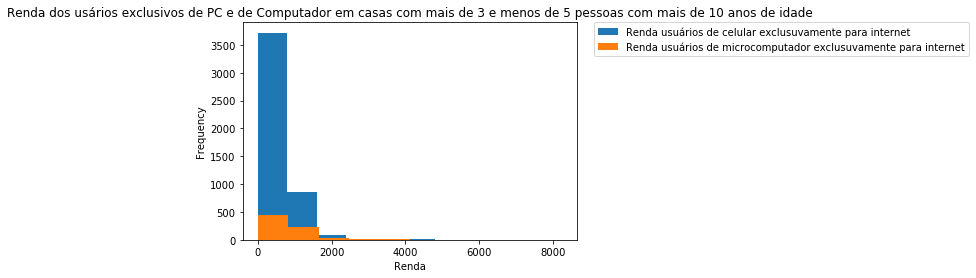

In [44]:
RendSoCel5=SoCel5['Rendimento mensal domiciliar per capita ']
RendSoCel5.plot.hist(label='Renda usuários de celular exclusuvamente para internet')

RendSoPc5=SoPc5['Rendimento mensal domiciliar per capita ']
RendSoPc5.plot.hist(label='Renda usuários de microcomputador exclusuvamente para internet')

plt.xlabel('Renda')

plt.title('Renda dos usários exclusivos de PC e de Computador em casas com mais de 3 e menos de 5 pessoas com mais de 10 anos de idade')

plt.legend(handles=[Azul,Laranja])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

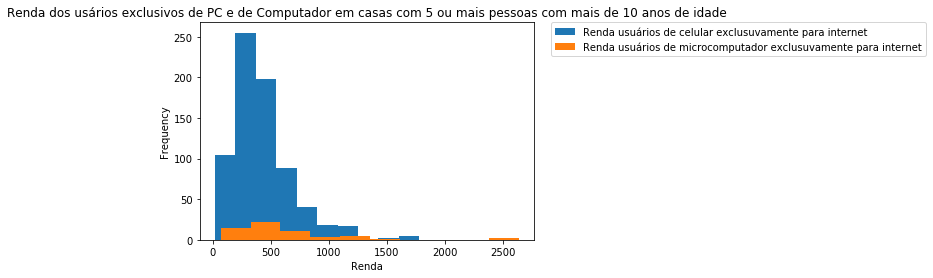

In [45]:
RendSoCel5=SoCel6['Rendimento mensal domiciliar per capita ']
RendSoCel5.plot.hist(label='Renda usuários de celular exclusuvamente para internet')

RendSoPc5=SoPc6['Rendimento mensal domiciliar per capita ']
RendSoPc5.plot.hist(label='Renda usuários de microcomputador exclusuvamente para internet')

plt.xlabel('Renda')

plt.title('Renda dos usários exclusivos de PC e de Computador em casas com 5 ou mais pessoas com mais de 10 anos de idade')

plt.legend(handles=[Azul,Laranja])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Aqui percebemos que a teoria é verdadeira pois nota-se um espalhamento muito maior das duas divisões em diferentes rendas. Mas, ao mesmo tempo as rendas vão continuamente diminuindo em comparação com as situações anteriores.

Estes três estogramas permitem concluir que conforme o número de pessoas com mais de 10 anos de idade nas residências sobe, a renda tende a descer mas as disparidades entre aqueles que para acessar a internet utilizam somente computadores e aqueles que utilizam somente celulares também sobe criando uma maior facilidade de convencimento para trocas de celular para computador e vice-versa.


Embora os gráficos se pareçam, aqui podemos notar que uma presença maior de pessoas com mais de 10 anos de idade em domicilios, podemos notar um maior espalhamente da população em diferentes rendas.

RendSoCel6=SoCel6['Rendimento mensal domiciliar per capita ']
RendSoCel6.plot.hist(label='Renda usuários de celular exclusuvamente para internet')

RendSoPc6=SoPc6['Rendimento mensal domiciliar per capita ']
RendSoPc6.plot.hist(label='Renda usuários de microcomputador exclusuvamente para internet')

plt.xlabel('Renda')
plt.title('Renda dos usários exclusivos de PC e de Computador em casas com 6 ou mais pessoas com mais de 10 anos de idade  (G3)')

plt.legend(handles=[Azul,Laranja])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Resolvi então analiar os usuários que mesmo tendo um celular, preferem usar a internet no PC. Essa parcela de pessoas é importante pois é o principal público das empresas de microcomputadores e um possível publico alvo para empresas de celulares.

In [17]:
SoPccomCel=SoPc[SoPc["Tem telefone movel celular"]=='Sim']
SoPccomCel

,Unnamed: 0,Faixa do rendimento mensal domiciliar per capita,Para acessar a Internet utiliza-se microcomputador,Para acessar a Internet utiliza-se telefone celular,Rendimento mensal domiciliar per capita,Tem telefone movel celular,Total de moradores de 10 anos ou mais
2,2,Mais de 1 até 2 salários mínimos,Sim,Não,1150.0,Sim,1.0
19,19,Mais de ½ até 1 salário mínimo,Sim,Não,600.0,Sim,2.0
32,32,Mais de ¼ até ½ salário mínimo,Sim,Não,366.0,Sim,5.0
33,33,Até ¼ salário mínimo,Sim,Não,175.0,Sim,4.0
42,42,Mais de 1 até 2 salários mínimos,Sim,Não,975.0,Sim,4.0
43,43,Mais de 1 até 2 salários mínimos,Sim,Não,850.0,Sim,2.0
45,45,Mais de ½ até 1 salário mínimo,Sim,Não,480.0,Sim,4.0
197,197,Mais de ¼ até ½ salário mínimo,Sim,Não,297.0,Sim,2.0
272,272,Mais de 1 até 2 salários mínimos,Sim,Não,808.0,Sim,3.0
285,285,Mais de 1 até 2 salários mínimos,Sim,Não,907.0,Sim,2.0


Separei esse grupo em faixas de rendas para uma descretização das rendas que mais preferem os computadores.

In [18]:
f=SoPccomCel['Faixa do rendimento mensal domiciliar per capita ']
ff=(f.value_counts(True)*100).iloc[:-2]
ff

Mais de 1 até  2 salários mínimos     32.095865
Mais de ½ até 1 salário mínimo        25.164474
Mais de  2 até  3 salários mínimos    12.241541
Mais de ¼ até ½ salário mínimo        10.267857
Mais de 3 até 5 salários mínimos       9.985902
Mais de 5 salários mínimos             7.048872
Até ¼ salário mínimo                   2.702068
Name: Faixa do rendimento mensal domiciliar per capita , dtype: float64

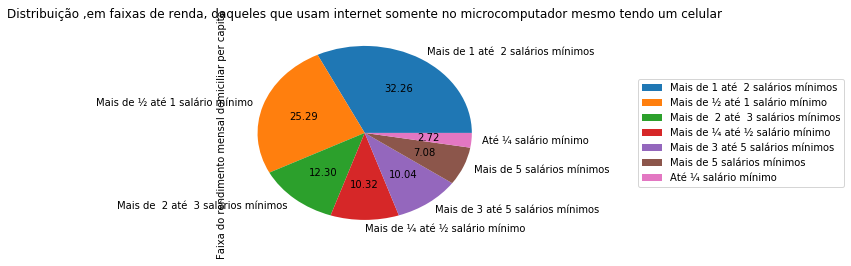

In [30]:
ff.plot.pie(autopct="%.2f",legend=True,title='Distribuição ,em faixas de renda, daqueles que usam internet somente no microcomputador mesmo tendo um celular')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height*1])
ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5),labels=None)

Aqui percebe-se uma grande expressividade das faixas de renda intermediar no gráfico mostrando que esse público tende a dar uma real preferência para o uso do microcomputador. (desculpe o gráfico poluído, não consegui remover a legenda automática)

Decidi investigar o uso preferencial de computador para aqueles que possuem celular em relação ao numero de pessoas presentes em cada faixa de renda

In [20]:
TemCel=Dados1[Dados1["Tem telefone movel celular"]=='Sim'].dropna()

In [37]:
TemCel1=TemCel.iloc[:,[1,2,3,6]]
TemCel1

,Faixa do rendimento mensal domiciliar per capita,Para acessar a Internet utiliza-se microcomputador,Para acessar a Internet utiliza-se telefone celular,Total de moradores de 10 anos ou mais
2,Mais de 1 até 2 salários mínimos,Sim,Não,1.0
3,Mais de 1 até 2 salários mínimos,Sim,Sim,4.0
8,Mais de 1 até 2 salários mínimos,Sim,Sim,4.0
10,Mais de 2 até 3 salários mínimos,Sim,Sim,3.0
11,Mais de 3 até 5 salários mínimos,Sim,Sim,1.0
13,Mais de 1 até 2 salários mínimos,Sim,Sim,2.0
15,Mais de ½ até 1 salário mínimo,Sim,Sim,2.0
17,Mais de ½ até 1 salário mínimo,Não,Sim,3.0
18,Mais de 1 até 2 salários mínimos,Sim,Sim,5.0
19,Mais de ½ até 1 salário mínimo,Sim,Não,2.0


In [38]:
Final=pd.crosstab(TemCel1['Faixa do rendimento mensal domiciliar per capita '],
                  TemCel1['Para acessar a Internet utiliza-se microcomputador'])

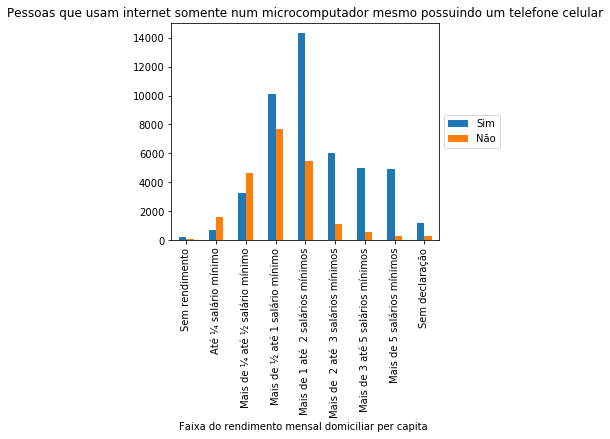

In [39]:
Final.plot(kind='bar',stacked=False,
          title='Pessoas que usam internet somente num microcomputador mesmo possuindo um telefone celular')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height*1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=None)

Este gráfico confirma o que foi teorizado no gráfico de setores quanto as faixas de rendas com maior relevancia para campanhas de marketing.

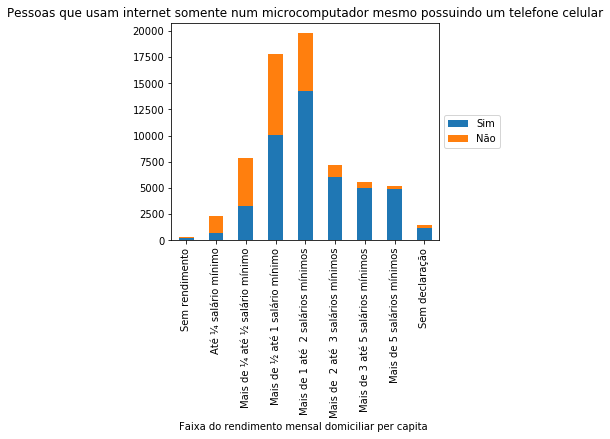

In [40]:
Final.plot(kind='bar',stacked=True,
           title='Pessoas que usam internet somente num microcomputador mesmo possuindo um telefone celular')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height*1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=None)

Este é o mesmo gráfico acima mas com os "Sim" e "Não" empilhados para uma visualização do publico total de cada faixa de renda.

## Conclusão

Após todas as analises de dados efetuadas foi possivel chegas as seguintes conclusões relevantes:

-Casas com uma renda menor e mais pessoas maiores de 10 anos possuem uma maior distribuição entre as pessoas que só usam computador ou que só usam celular como dito na discussão anterior, tornando o público mais passível de converssão para o outro aparato

-As casas com rendas de 1/2 até 2 salários minimos repesentam mais de 50% do todas de casas onde mesmo se possuindo um celular, a preferencia para o uso da internet é o microcomputador.
Se tornando assim um grande alvo em potencial para empresas de telefonia móvel.


-É importante relatar que embora o publico com renda media mensal de 1 a 2 salários minimos sejam maiores em número, o público alvo que ainda pode ser convencido a usar internet pelo celular é maior para aqueles com renda mádia de 1/2 até 1 salário minimo. Uma sugestão seria a criação de planos de dados de redes moveis ideais para esse publico.